In [384]:
import pandas as pd
import yfinance as yf
import string
import math
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
translator = str.maketrans('', '', string.punctuation)

def getData(period,interval):
    DF = yf.Ticker("BTC-USD").history(period = period, interval = interval)[['Open']]
    PDDF = pd.DataFrame(DF)
    times = PDDF.index.tolist()
    DAT = DF.values.tolist()
    for i in range(0,len(DAT)):
        time = str(times[i]).split(" ")[0]
        time = int(time.translate(translator))
        DAT[i].insert(0,time)
    return DAT
    
data5 = getData("5y","1d")

In [387]:
def merge(arr, left, mid, right):
    n1 = mid - left + 1
    n2 = right - mid
    L = [0] * (n1)
    R = [0] * (n2)
    for i in range(0, n1):
        L[i] = arr[left + i]
 
    for j in range(0, n2):
        R[j] = arr[mid + 1 + j]
    i = 0 
    j = 0 
    k = left 
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
def mergeSort(arr, left, right):
    if left < right:
        mid = left+(right-left)//2
        mergeSort(arr, left, mid)
        mergeSort(arr, mid+1, right)
        merge(arr, left, mid, right)
        
def sortData(d):
    n = len(d)
    mergeSort(d, 0, n-1)
    p = [i[1] for i in d]
    da = [i[0] for i in d]
    return p,da
p,da = sortData(data5)

In [388]:
def maxGain(stocks):
    globalmax = 0
    localmax = 0
    for i in range(1, len(stocks)):
        localmax = max(0, localmax + (stocks[i] - stocks[i - 1]))
        if (localmax > globalmax):
            globalmax = localmax
    return globalmax
def getMaxGain(prices):
    maxg = maxGain(prices)
    print("Maximum Gain:", maxg)
getMaxGain(prices)

Maximum Gain: 65948.2548828125


In [401]:
def getPairList(data):
    pairOfPoints = []
    for i in range(0,len(data)):
        pairOfPoints.append([i,data[i]])
    return pairOfPoints
    #For simplicity, 1 int = 7 days, or 1 week.    

[ 54  55  56  68  72  78  81 104 113 135 232 233 236 256]


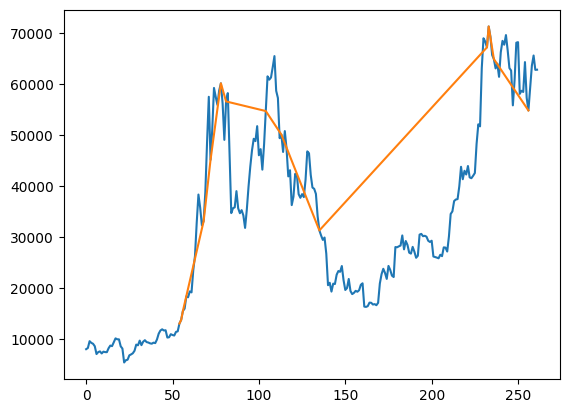

In [410]:
def knn(data,k,percentage):
    neighbors = NearestNeighbors(n_neighbors = k+1).fit(data)
    distances, _ = neighbors.kneighbors(data)
    avgdist = np.mean(distances[:,1:],axis =1)
    threshold = np.percentile(avgdist,percentage)
    outliers = np.where(avgdist > threshold)[0]
    return outliers


def getOutlierValues(prices,outliers):
    priceoutliers = []
    for i in range(0,len(outliers)):
        priceoutliers.append(prices[outliers[i]])
    return priceoutliers
def graphData(prices,priceOutliers,outliers):
    plt.plot(prices)
    plt.plot(outliers,priceOutliers)

def graphAll(pr,k,pe):
    pairOfPoints = getPairList(pr)
    outliers = knn(pairOfPoints,k,pe)
    print(outliers)
    priceOutliers = getOutlierValues(pr,outliers)
    graphData(prices,priceOutliers,outliers)
graphAll(prices,2,95)

Maximum Gain: 65948.2548828125
[ 55  72 233]


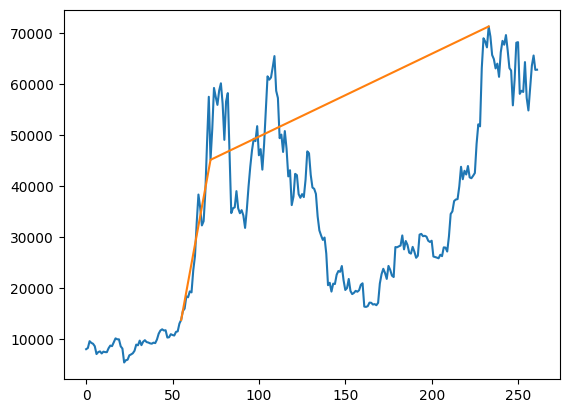

In [409]:
def finalAlgorithm():
    k = 5 # For KNN 
    p = 99 # How strict should outlier detection be?
    data1 = getData("5y","1wk")
    prices1,dates1 = sortData(data1)
    getMaxGain(prices1)
    pairOfPoints1 = getPairList(prices1)
    graphAll(prices1,k,p)
    
finalAlgorithm()